# Custom Datasets

In [2]:
import torch
from torch import nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

## 1. Get data

Data is a subset of Food-101 (3 classes and only 10% of images).

In [3]:
import requests
import zipfile
from pathlib import Path

# setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# if image folder doesn't exist, download and prepare it
if image_path.is_dir():
  print(f"{image_path} directory already exists, skipping download")
else:
  print(f"{image_path} doesn't exist, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download dataset
with open(data_path / "pizza_stak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak and sushi data...")
  f.write(request.content)
  print("Writing contents to pizza_stak_sushi.zip")

# unzip data
with zipfile.ZipFile(data_path / "pizza_stak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak and sushi data to image path")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi directory already exists, skipping download
Writing contents to pizza_stak_sushi.zip
Unzipping pizza, steak and sushi data to image path


## 2. Data preparation and exploration

In [4]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path, returning its contents"""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [5]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.


In [6]:
# setup train and test paths
train_dir = image_path / "train"
test_dir = image_path / "test"
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

## 2.1 Visualizing an image
1. Get all image paths
2. Pick a random image path
3. Get image class name using `pathlib.Path.parent.stem`
4. Open the image with Python's Pillow (PIL)
5. Show image and print metadata

Random image path: data/pizza_steak_sushi/test/pizza/2236338.jpg
Image clas: pizza
Image height: 512
Image width: 512


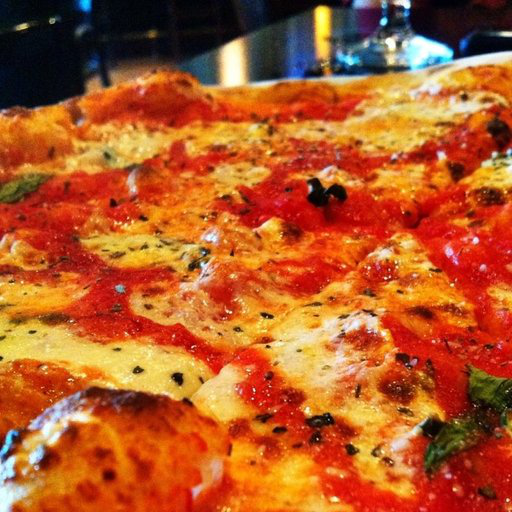

In [7]:
import random
from PIL import Image

random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image clas: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

#### Matplotlib

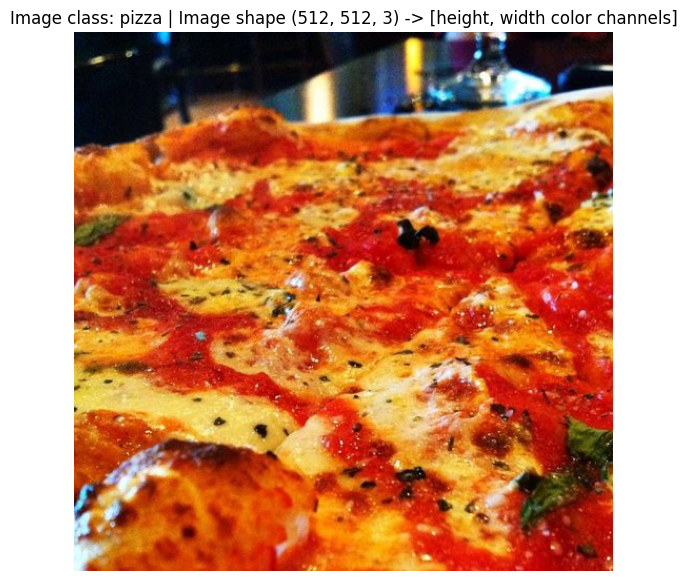

In [8]:
import numpy as np 
import matplotlib.pyplot as plt

# turn image into array
img_as_array = np.asarray(img)

# plot the img with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape {img_as_array.shape} -> [height, width color channels]")
plt.axis(False);


In [9]:
img_as_array

array([[[  7,  18,  38],
        [  5,  16,  34],
        [  2,  13,  31],
        ...,
        [ 18,   7,  11],
        [ 12,   6,   8],
        [  8,   4,   5]],

       [[  2,  13,  33],
        [  2,  13,  31],
        [  2,  13,  31],
        ...,
        [ 18,   9,  10],
        [ 17,  11,  13],
        [ 16,  12,  13]],

       [[  0,  11,  31],
        [  1,  12,  30],
        [  3,  14,  32],
        ...,
        [ 17,   8,   9],
        [ 16,  10,  12],
        [ 15,  11,  12]],

       ...,

       [[226, 249, 255],
        [229, 253, 255],
        [229, 255, 254],
        ...,
        [250, 149,  95],
        [240, 139,  83],
        [234, 130,  75]],

       [[220, 247, 254],
        [224, 252, 255],
        [226, 255, 253],
        ...,
        [236, 133,  88],
        [195,  88,  42],
        [170,  62,  16]],

       [[218, 247, 255],
        [223, 252, 255],
        [224, 254, 254],
        ...,
        [255, 157, 116],
        [208,  99,  60],
        [166,  52,  15]]

## 3. Transforming data

Before we can use image data with PyTorch:
1. Turn your target data into tensors (in our case: numerical representation of images)
2. Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.DataLoader`, call these `Dataset` and `Dataloader`
3. 

In [10]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### 3.1 Transforming data with `torchvision.transforms`

In [11]:
# tranform for an image
data_transform = transforms.Compose([
  # Resize images to 64x64
  transforms.Resize(size=(64, 64)),

  # Flip the images randomly on the horizontal axis
  transforms.RandomHorizontalFlip(p=0.5),

  # Turn the image into a torch tensor
  transforms.ToTensor()
])

In [12]:
data_transform(img).shape, data_transform(img).dtype

(torch.Size([3, 64, 64]), torch.float32)

### 3.2 Visualizing transformed images

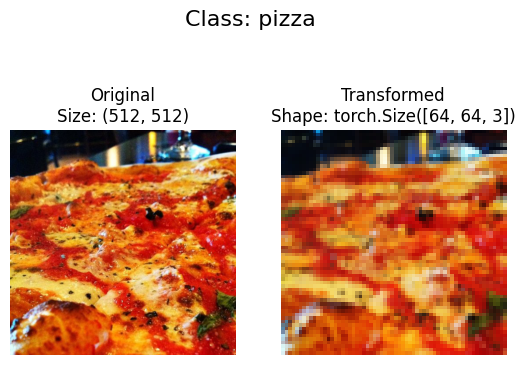

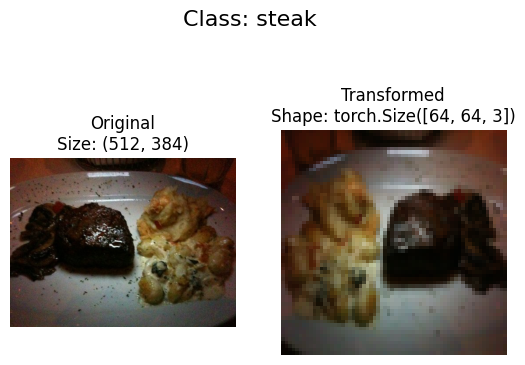

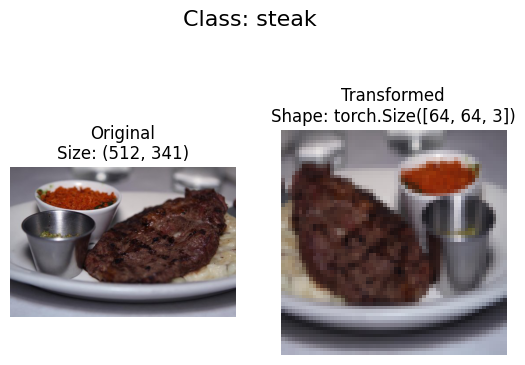

In [13]:
def plot_transformed_images(image_paths, transform, n=3, seed=None):
  """
  Selects random images from a path of images and transforms them, then plots
  the originals and tranformed versions.
  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      # Transform and plot target image
      transformed_image = transform(f).permute(1, 2, 0) # make color channels first -> last
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
      ax[1].axis('off')

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list, transform=data_transform, n=3, seed=42)

### 4. Option 1: Loading image data using `ImageFolder`


In [14]:
# use imagefolder to create a dataset
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, transform=data_transform, target_transform=None) # Transforms for data and target
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform) # defualt is None
train_data, test_data 

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [15]:
# get class names as list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [16]:
# get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [17]:
# index on train dataset to get a single image and a label
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image dataype: {img.dtype}")
print(f"Image label: {class_names[label]}")

Image tensor:
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0706, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0

torch.Size([3, 64, 64]) torch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

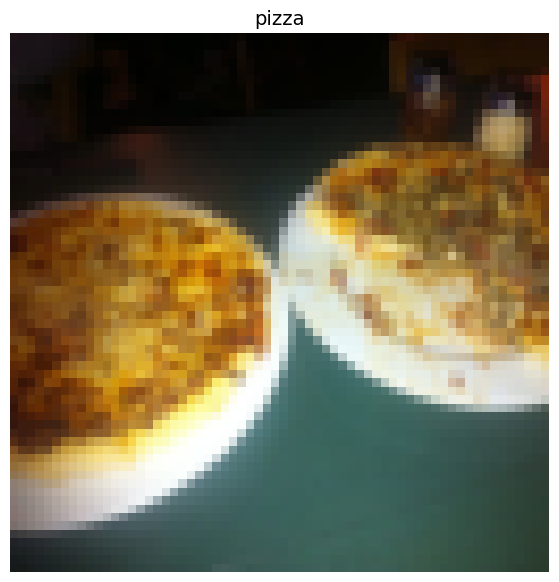

In [18]:
# rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

print(img.shape, img_permute.shape)

# plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis('off')
plt.title(class_names[label], fontsize=14)

### 4.1 Turn loaded images into `DataLoader`

A `DataLoader` is going to help us turn our `Dataset`s into iterables and we can customize the batch size so our model can see `batch_size` number of images at a time

In [19]:
import os
print(f"Number of CPUs: {os.cpu_count()}")
from torch.utils.data import DataLoader

BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data,
                           batch_size=BATCH_SIZE,
                           num_workers=os.cpu_count(),
                           shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle=False)
train_dataloader, test_dataloader

Number of CPUs: 10


(<torch.utils.data.dataloader.DataLoader at 0x7fb92889b430>,
 <torch.utils.data.dataloader.DataLoader at 0x7fb92889b340>)

In [20]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [21]:
img, label = next(iter(train_dataloader))

# batch size will now be 1, can be changed
print(f"Image shape: {img.shape} -> [batch size, color channels, height, width]")
print(f"Label shape: {label.shape}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [22]:
print(f"Image shape: {img.shape} -> [batch size, color channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch size, color channels, height, width]
Label shape: torch.Size([1])


## 5. Option 2: Loading data with a custom `Dataset`
1. Be able to load images from file
2. Be able to get class names from Dataset
3. Be able to get classes as dictionary from Dataset

In [23]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

# instance of ImageFolder
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Helper function to get class names
1. Get class names using `os.scanddir()` to traverse a target directory ideally in standard image classification format
2. Raise an error if the class names aren't found
3. Turn the class names into a dict and list and return them

In [24]:
# setup path for target directory
target_dir = train_dir
print(f"Target directory: {target_dir}")

# get class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_dir))])
class_names_found

Target directory: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [26]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """Finds the class folder names in a target directory"""
  # 1. Get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  # 2. Raise an error if class names could not be found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}")
  
  # 3. Create a dictionary of index labels
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx
  


In [27]:
find_classes(target_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom Dataset to replicate ImageFolder

1. Subclass torch.utils.data.Dataset
2. Init our cubclass with a target directory as well as a transform if we want to transform the data
3. Create several attributes:
  * paths - paths of our images
  * transform - the transform for the data
  * classes - a list of the target classes
  * class_to_idx - dict of the target classes mapped to integer labels
4. Create a function to load_images, this function will open an image
5. Overwrite the __len()__ method to return the length of our dataset
6. Overwrite the __getitem()__ method to return a given sample when passed an index

In [28]:
# write a custom dataset class
from torch.utils.data import Dataset

# 1. subclass Dataset
class ImageFolderCustom(Dataset):
  # 2. Initialize
  def __init__(self, targ_dir: str, transform=None):
    # 3. Create class attributes
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    # setup transform
    self.transform = transform
    # create classes and class_to_idx attributes
    self.classes, self.class_to_idx = find_classes(targ_dir)
    
  # 4. Create a function to load images
  def load_image(self, index: int) -> Image.Image:
    "Opens an image via a path and returns it."
    image_path = self.paths[index]
    return Image.open(image_path)
  
  # 5. Overwrite len
  def __len__(self) -> int:
    "Returns the total number of samples."
    return len(self.paths)
  
  # 6. Overwrite to return a particular sample
  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    "Returns one sample of data, data and label (X, y)."
    img = self.load_image(index)
    class_name = self.paths[index].parent.name # expects path in format: data_folder/class_name/image.jpg
    class_idx = self.class_to_idx[class_name]

    # Transform if necessary
    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx
    

In [29]:
# create a tranform
import torchvision.transforms
train_transforms = transforms.Compose([
  transforms.Resize(size=(64, 64)),
  transforms.RandomHorizontalFlip(p=0.5),
  transforms.ToTensor()
])

test_transforms = transforms.Compose([
  transforms.Resize(size=(64, 64)),
  transforms.ToTensor
])

train_data_custom = ImageFolderCustom(targ_dir=target_dir, transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=target_dir, transform=test_transforms)

train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7fb8f9b0df00>,
 <__main__.ImageFolderCustom at 0x7fb8f9b0ed40>)

In [30]:
len(train_data), len(train_data_custom)

(225, 225)

In [32]:
train_data_custom.classes, train_data_custom.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.3 Function to display random images

1. Take in a Dataset and a number of other parameters such as class names and number of images to visualize
2. Cap images at 10
3. Set the random seed
4. Get a list of random sample indices from the target dataset
5. Matplotlib plot
6. Loop through random sample images and plot them
7. Make sure dimensions line up with MPL (HWC)

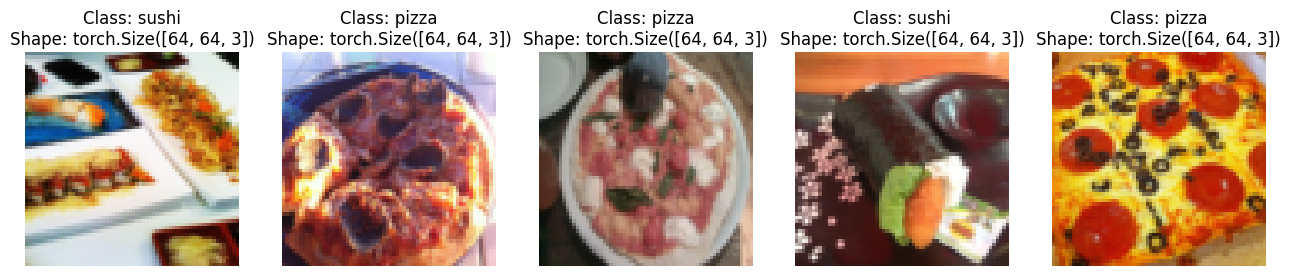

In [35]:
# 1. Creat a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int=10,
                          display_shape: bool = True,
                          seed: int = None):
  # 2. Cap at 10 images
  if n < 0 or n > 10:
    n = 10

  # 3. set seed
  if seed:
    random.seed(seed)

  # 4. Get random indices
  random_samples_idx = random.sample(range(len(dataset)), k=n)
  
  # 5. Plot
  plt.figure(figsize=(16, 8))

  # 6. Loop through random indices and plot them
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    # 7. Adjust tensor dimensions for plotting
    targ_image_adjust = targ_image.permute(1, 2, 0) # CHW -> HWC

    # Plot adjusted samples
    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis(False)
    if classes:
      title = f"Class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nShape: {targ_image_adjust.shape}"
    plt.title(title)

display_random_images(train_data, n=5, classes=class_names, seed=42)

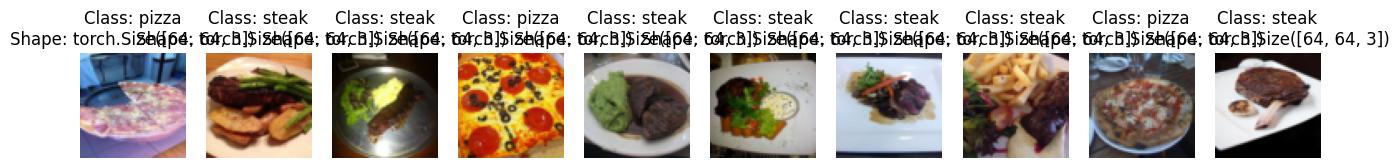

In [37]:
# Display random images from the custom dataset
display_random_images(train_data_custom, n=10, classes=class_names, seed=42)

In [38]:
### 5.4 Turn custom loaded images into DataLoaders

In [39]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
train_dataloader_custom = DataLoader(dataset=train_data_custom, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, shuffle=True)
test_dataloader_custom = DataLoader(dataset=test_data_custom, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, shuffle=False)
train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7fb91900b670>,
 <torch.utils.data.dataloader.DataLoader at 0x7fb91900b610>)

In [41]:
# get image and label from custom dataloader
img_custom, label_custom = next(iter(train_data_custom))
img_custom.shape

torch.Size([3, 64, 64])

## 6. Data augmentation

In [43]:
# TrivialAugment
from torchvision import transforms

train_transform = transforms.Compose([
  transforms.Resize(size=(224, 244)),
  transforms.TrivialAugmentWide(num_magnitude_bins=31),
  transforms.ToTensor()
])

test_transform = transforms.Compose([
  transforms.Resize(size=(224, 224)),
  transforms.ToTensor()
])

train_transform, test_transform

(Compose(
     Resize(size=(224, 244), interpolation=bilinear, max_size=None, antialias=warn)
     TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
     ToTensor()
 ),
 Compose(
     Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
     ToTensor()
 ))

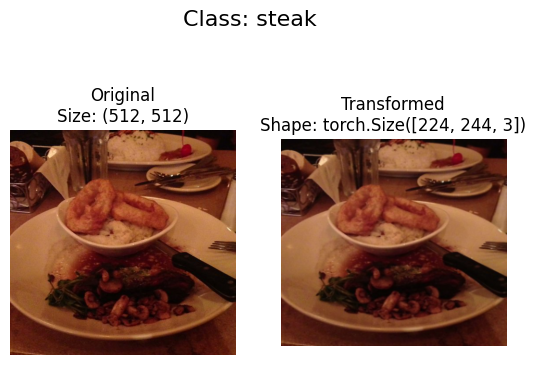

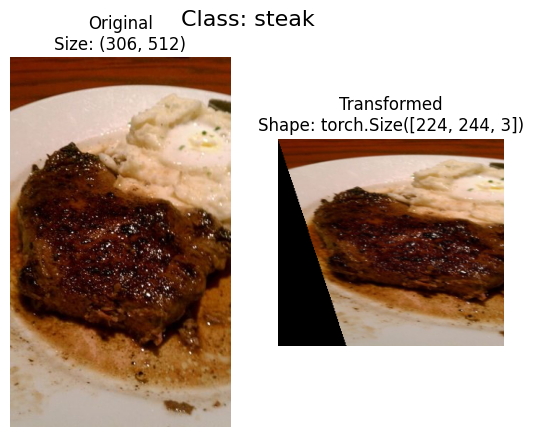

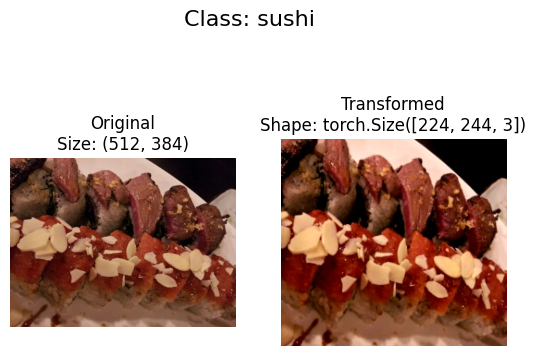

In [46]:
# plot random images
plot_transformed_images(
  image_paths=image_path_list,
  transform=train_transform,
  n=3, seed=None
)

## 7. Model 0: TinyVGG without data augmentation

### 7.1 Transforms and loading data

In [48]:
# simple transform
simple_transform = transforms.Compose([
  transforms.Resize(size=(64, 64)),
  transforms.ToTensor()
])

# load data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)

# turn datasets into dataloaders
import os
from torch.utils.data import DataLoader

# setup batch size and number of workers
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# create dataloaders
train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)
train_dataloader_simple, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7fb8f9c6c6d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7fb8f9c87400>)

### 7.2 Create TinyVGG model class

In [64]:
class TinyVGG(nn.Module):
  """
  Model architecture copied from CNN explainer
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
      nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2, stride=2)
    )

    self.conv_block_2 = nn.Sequential(
      nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2, stride=2)
    )

    self.classifier = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=1690, out_features=output_shape)
    )

  def forward(self, x):
    # x = self.conv_block_1(x)
    # print(x.shape)
    # x = self.conv_block_2(x)
    # print(x.shape)
    # x = self.classifier(x)
    # print(x.shape)
    # return x
    # benefits from operator fusion
    return self.classifier(self.conv_block_2(self.conv_block_1(x)))

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels
                  hidden_units=10,
                  output_shape=len(class_names)).to(device) 

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

### 7.3 Forward pass on a single image

In [65]:
# pass in dummy data to check input and output shapes
# get single image
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [66]:

model_0.forward(image_batch)

tensor([[ 2.0789e-02, -1.9351e-03,  9.5317e-03],
        [ 1.8427e-02,  2.4670e-03,  6.6757e-03],
        [ 1.7699e-02,  1.0262e-03,  9.4657e-03],
        [ 2.4441e-02, -3.3526e-03,  9.6011e-03],
        [ 1.9930e-02,  6.6316e-04,  1.0779e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0999e-02,  1.2869e-04,  1.2473e-02],
        [ 2.1577e-02, -1.9507e-03,  9.6941e-03],
        [ 2.4504e-02, -4.7745e-03,  8.5280e-03],
        [ 2.0252e-02, -4.7292e-04,  1.0908e-02],
        [ 2.2215e-02, -4.1838e-04,  9.8123e-03],
        [ 2.2313e-02, -2.1622e-03,  9.4455e-03],
        [ 2.1841e-02, -3.7132e-03,  8.3783e-03],
        [ 2.2863e-02, -1.7723e-03,  1.0287e-02],
        [ 2.1647e-02, -4.4139e-03,  9.5021e-03],
        [ 2.2096e-02, -4.1426e-03,  9.3853e-03],
        [ 2.1209e-02, -4.4219e-03,  1.1475e-02],
        [ 2.1711e-02, -2.7656e-03,  8.5006e-03],
        [ 1.9951e-02,  2.8258e-05,  8.4380e-03],
        [ 1.8298e-02,  1.6306e-03,  8.5499e-03],
        [ 2.0768e-02

### 7.4 Torchinfo to see the input and output shapes of the model

In [68]:
from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64]) # single image batch

[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

### 7.5 Create train and test loop functions
* `train_step()` - takes in a model and dataloader and trains the model on the dataloader
* `test_step()` takes in a model and dataloader and evaluates the model on the dataloader

In [69]:
# create train step
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):
    # put model in train mode
    model.train()

    # setup train loss and accuracy
    train_loss, train_acc = 0, 0

    # loop through data loader batches
    for batch, (X, y) in enumerate(dataloader):
      # send data to target device
      X, y = X.to(device), y.to(device)

      # forward pass
      y_pred = model(X) # outputs logits

      # calculate the loss
      loss = loss_fn(y_pred, y)
      train_loss += loss.item()

      # optimizer zero grad
      optimizer.zero_grad()

      # backprop
      loss.backward()

      # update weights
      optimizer.step()

      # calculate accuracy
      y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
      train_acc += (y_pred_class==y).sum().item() / len(y_pred)

    # adjust metrics to get averages
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    return train_loss, train_acc

# create test step
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
  # put model in eval mode
  model.eval()

  # setup test loss and acc
  test_loss, test_acc = 0, 0

  # turn on inference mode
  with torch.inference_mode():
    # loop through data loader
    for batch, (X, y) in enumerate(dataloader):
      # send data to target device
      X, y = X.to(device), y.to(device)

      # forward pass
      test_pred_logits = model(X)

      # calc loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # calc acc
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += (test_pred_labels==y).sum().item() / len(test_pred_labels) 

  # get averages
  test_loss /= len(dataloader)
  test_acc /= len(dataloader)
  return test_loss, test_acc

### 7.6 Train function to combine train step and test step

In [86]:
from tqdm.auto import tqdm

# create train function
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device=device):
    
  # create empty results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}
  
  # loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model, dataloader=train_dataloader, loss_fn=loss_fn, optimizer=optimizer, device=device)
    test_loss, test_acc = test_step(model=model, dataloader=test_dataloader, loss_fn=loss_fn, device=device)

    # print out what's happening
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train accuracy: {train_acc:.4f}\nTest loss: {test_loss:.4f} | Test accuracy: {test_acc:.4f}")

    # update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # return the filled results
  return results

### 7.7 Train and evaluate model 0

In [87]:
torch.manual_seed(42)
NUM_EPOCHS = 5

# model instance
model_0 =  TinyVGG(input_shape=3, hidden_units=10, output_shape=len(train_data.classes)).to(device)

# loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# start the timer
from timeit import default_timer as timer
start_time = timer()

# train model 0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# end timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time - start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


 20%|██        | 1/5 [01:07<04:28, 67.21s/it]

Epoch: 0 | Train loss: 1.1063 | Train accuracy: 0.3047
Test loss: 1.0983 | Test accuracy: 0.3116
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Ker

 40%|████      | 2/5 [02:13<03:19, 66.55s/it]

Epoch: 1 | Train loss: 1.0995 | Train accuracy: 0.3320
Test loss: 1.0699 | Test accuracy: 0.5417
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Ker

 60%|██████    | 3/5 [03:18<02:11, 65.87s/it]

Epoch: 2 | Train loss: 1.0863 | Train accuracy: 0.4922
Test loss: 1.0800 | Test accuracy: 0.5227
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Ker

 80%|████████  | 4/5 [04:22<01:05, 65.38s/it]

Epoch: 3 | Train loss: 1.0826 | Train accuracy: 0.4102
Test loss: 1.0599 | Test accuracy: 0.5729
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Ker

100%|██████████| 5/5 [05:28<00:00, 65.63s/it]

Epoch: 4 | Train loss: 1.0630 | Train accuracy: 0.4141
Test loss: 1.0609 | Test accuracy: 0.5540
Total training time: 328.133 seconds


In [88]:
model_0_results

{'train_loss': [1.1063424497842789,
  1.0994839817285538,
  1.0862885564565659,
  1.0826268643140793,
  1.0630055665969849],
 'train_acc': [0.3046875, 0.33203125, 0.4921875, 0.41015625, 0.4140625],
 'test_loss': [1.0983143250147502,
  1.0698524713516235,
  1.0800257126490276,
  1.0598575274149578,
  1.060938874880473],
 'test_acc': [0.31155303030303033,
  0.5416666666666666,
  0.5227272727272728,
  0.5729166666666666,
  0.5539772727272728]}

### 7.8 Plot loss curves of model 0

In [89]:
# get keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [90]:
def plot_loss_curves(results: Dict[str, List[float]]):
  """Plots loss curves of a results dictionary"""
  # get training and test loss values
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  # get accuracy values
  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  # get number of epochs
  epochs = range(len(results["train_loss"]))

  # setup plot
  plt.figure(figsize=(15, 7))

  # plot the loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # plot accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();

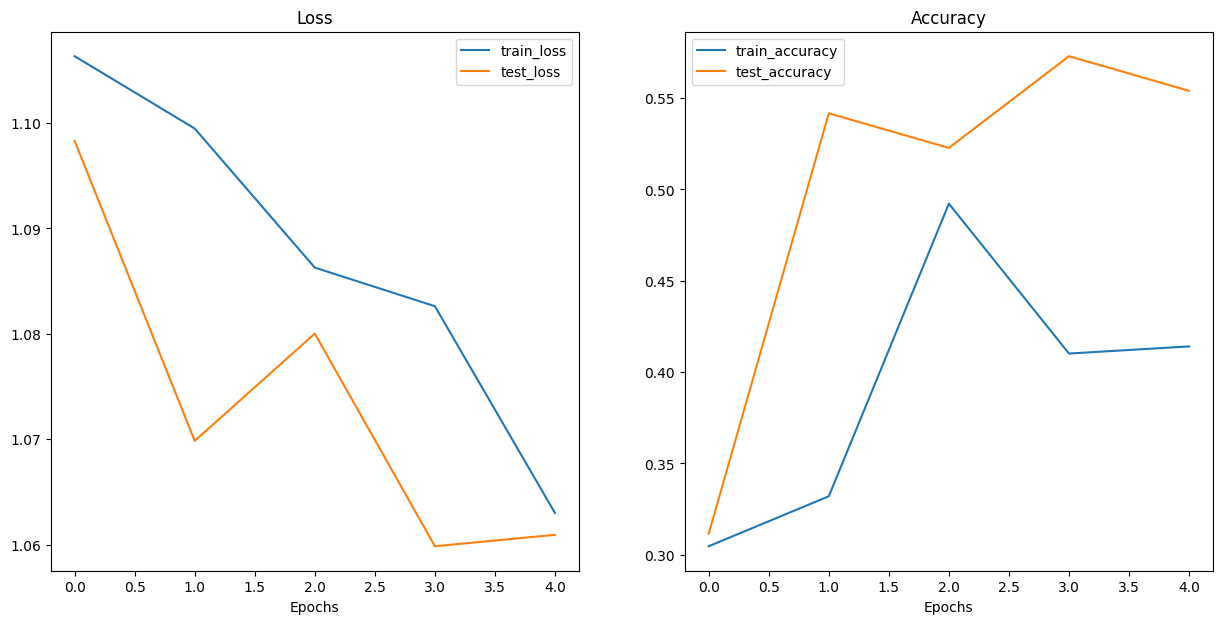

In [91]:
plot_loss_curves(model_0_results)

## 8. What should an ideal loss curve look like?
Training and test losses are similar and decreasing.

## 9. Model 1: TinyVGG with data augmentation

### 9.1 Create transform with data augmentation

In [93]:
from torchvision import transforms
train_transform_trivial = transforms.Compose([
  transforms.Resize(size=(64, 64)),
  transforms.TrivialAugmentWide(num_magnitude_bins=31),
  transforms.ToTensor()
])

test_transform_simple = transforms.Compose([
  transforms.Resize(size=(64, 64)),
  transforms.ToTensor()
])

### 9.2 Create train and test Datasets and Dataloaders with data augmentation

In [94]:
# turn image folders into datasets
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root=train_dir, transform=train_transform_trivial)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=test_transform_simple)

# turn datasets into dataloaders
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(
  dataset=train_data_augmented,
  batch_size=BATCH_SIZE,
  shuffle=True,
  num_workers=NUM_WORKERS
)

test_dataloader_simple = DataLoader(
  dataset=test_data_simple,
  batch_size=BATCH_SIZE,
  shuffle=False,
  num_workers=NUM_WORKERS
)

### 9.3 Construct and train model 1
Same model architecture but with augmented training data.

In [95]:
# create model 1
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data_augmented.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [97]:
torch.manual_seed(42)

# set epochs
NUM_EPOCHS = 5

# setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# start timer
from timeit import default_timer as timer
start_time = timer()

# train model 1
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device)

# end timer and print how long it took
end_time = timer()
print(f"Total training time for model 1: {end_time - start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


 20%|██        | 1/5 [01:05<04:22, 65.62s/it]

Epoch: 0 | Train loss: 1.1046 | Train accuracy: 0.2500
Test loss: 1.1016 | Test accuracy: 0.2604
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Ker

 40%|████      | 2/5 [02:10<03:15, 65.32s/it]

Epoch: 1 | Train loss: 1.0764 | Train accuracy: 0.4258
Test loss: 1.1301 | Test accuracy: 0.2604
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Ker

 60%|██████    | 3/5 [03:16<02:10, 65.35s/it]

Epoch: 2 | Train loss: 1.0733 | Train accuracy: 0.4258
Test loss: 1.1679 | Test accuracy: 0.2604
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Ker

 80%|████████  | 4/5 [04:21<01:05, 65.28s/it]

Epoch: 3 | Train loss: 1.1220 | Train accuracy: 0.3047
Test loss: 1.1552 | Test accuracy: 0.2604
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Ker

100%|██████████| 5/5 [05:26<00:00, 65.24s/it]

Epoch: 4 | Train loss: 1.0775 | Train accuracy: 0.4609
Test loss: 1.1522 | Test accuracy: 0.2812
Total training time for model 1: 326.213 seconds


In [98]:
model_1_results

{'train_loss': [1.1045748889446259,
  1.076416790485382,
  1.0732826590538025,
  1.122040331363678,
  1.0774989575147629],
 'train_acc': [0.25, 0.42578125, 0.42578125, 0.3046875, 0.4609375],
 'test_loss': [1.1015872955322266,
  1.130135456720988,
  1.1678582429885864,
  1.1551623344421387,
  1.1522294680277507],
 'test_acc': [0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.28125]}

### 9.4 Plot loss currves of model 1

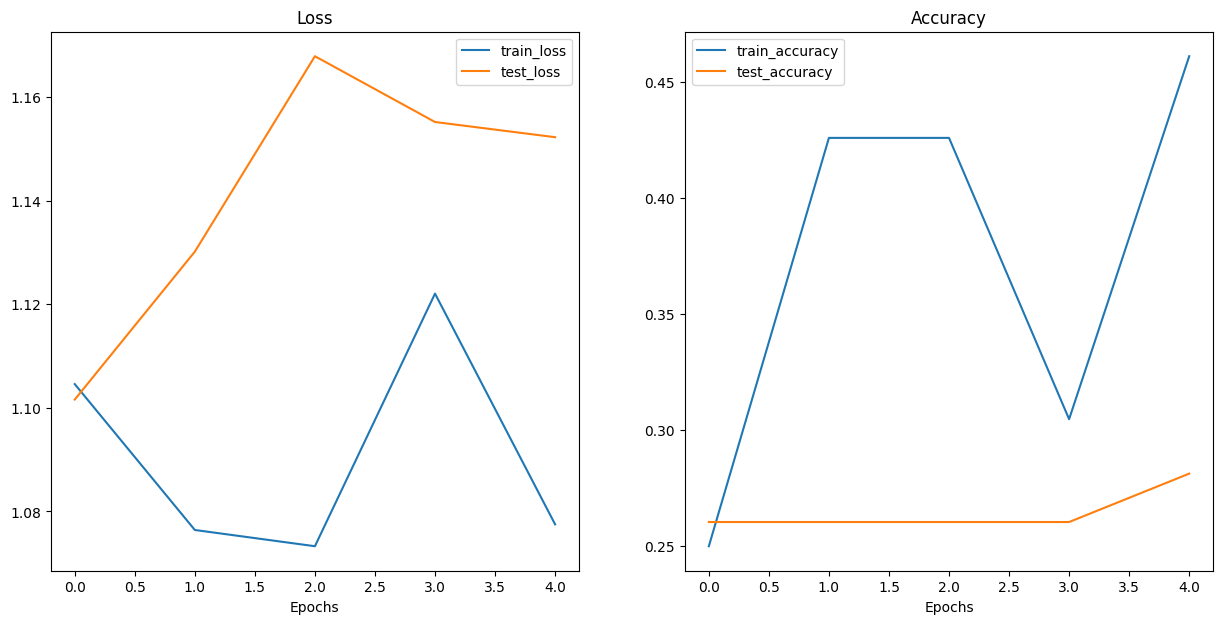

In [99]:
plot_loss_curves(model_1_results)

## 10. Compare model results
* Weights and biases
* PyTorch and Tensorboard
* MLFlow

In [101]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.106342,0.304688,1.098314,0.311553
1,1.099484,0.332031,1.069852,0.541667
2,1.086289,0.492188,1.080026,0.522727
3,1.082627,0.410156,1.059858,0.572917
4,1.063006,0.414062,1.060939,0.553977


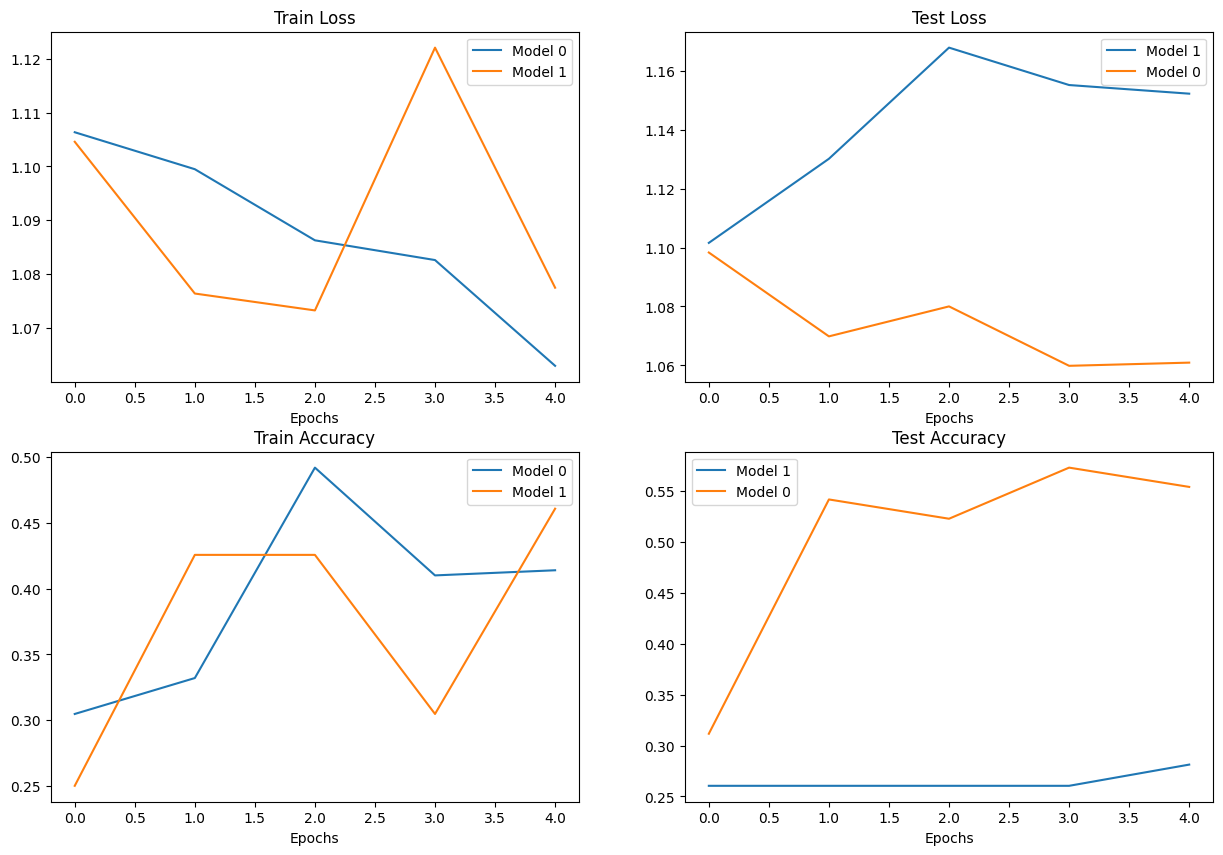

In [105]:
# setup plot
plt.figure(figsize=(15, 10))
epochs = range(len(model_0_df))

# plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend();

# plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend();

# plot train acc
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend();

# plot test acc
plt.subplot(2, 2, 4)
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

## 11. Making a prediction on a custom image

In [106]:
# download custom image
import requests

# setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# download image if it doesn't exist
if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f:
    # use raw link
    print(f"Downloading {custom_image_path}")
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/cab559ede60714cfe8c26b1de1ea60decca2c879/images/04-pizza-dad.jpeg")
    f.write(request.content)
else:
  print(f"{custom_image_path} already exists")

### 11.1 Loading in a custom image with PyTorch
* Tensor form with dtype float32
* Shape 64x64x3
* On right device

Read an image into PyTorch using read mode.

In [108]:
import torchvision

# read in custom image
custom_image_unit8 = torchvision.io.read_image(str(custom_image_path))
custom_image_unit8

tensor([[[154, 175, 181,  ...,  21,  18,  14],
         [146, 167, 180,  ...,  21,  18,  15],
         [124, 146, 171,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 189, 193,  ...,  22,  19,  15],
         [163, 181, 194,  ...,  22,  19,  16],
         [141, 163, 185,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 106, 104, 102],
         [ 47,  38,  24,  ..., 108, 105, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[117, 138, 145,  ...,  17,  14,  10],
         [109, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  54,  52,  50],
         [ 27,  18,   4,  ...,  50,  47,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

In [110]:
print(f"Custom image shape: {custom_image_unit8.shape}")

Custom image shape: torch.Size([3, 4032, 3024])


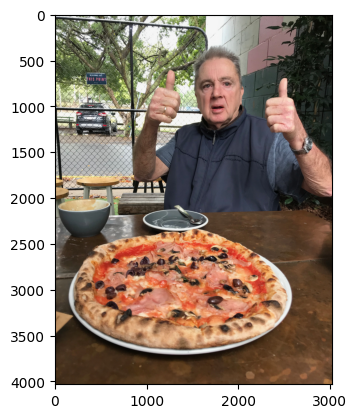

In [109]:
plt.imshow(custom_image_unit8.permute(1, 2, 0))

### 11.2 Making a prediction on a custom image

In [113]:
# convert to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32) / 255

# reshape to model's format
custom_image_transform = transforms.Compose([
  transforms.Resize(size=(64, 64)) 
])

custom_image_transformed = custom_image_transform(custom_image)

# need to add batch size
custom_image_batch = custom_image_transformed.unsqueeze(0)

# try to make a prediction on an image
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_batch.to(device))
custom_image_pred

/Users/alexgeorgiev/opt/anaconda3/envs/torch-gpu/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


tensor([[ 0.0434,  0.0690, -0.2097]])

(-0.5, 63.5, 63.5, -0.5)

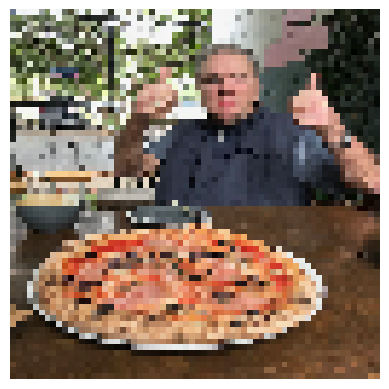

In [114]:
plt.imshow(custom_image_transformed.permute(1, 2, 0));
plt.axis(False)

* Load image and turn it into a tensor
* Make sure the image is in float32
* Make sure the image is in the right shape (1, 3, 64, 64
* Make sure image is one same device as model)

In [115]:
# convert logits to pred probs
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
custom_image_pred_probs

tensor([[0.3568, 0.3661, 0.2771]])

In [120]:
# get pred label
class_names[torch.argmax(custom_image_pred_probs)]

'steak'

### 11.3 Putting custom image prediction together with a function
Pass an image path and have the model predict the image and plot the image and its prediction.

In [122]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform = None,
                        device = device):
  """Makes a prediction on a target image with a trained model and plots the image and prediction."""

  # load image
  target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

  # device the image pixel values to get them between 0 and 1
  target_image = target_image / 255

  # transform if necessary
  if transform:
    target_image = transform(target_image)
  
  # make sure model is on target device
  model.to(device)

  # turn on eval/inference mode and make a prediction
  model.eval()
  with torch.inference_mode():
    # add extra dimension for batch size
    target_image = target_image.unsqueeze(0)

    # make prediction, logits
    target_image_pred = model(target_image.to(device))

  # convert logits to pred probs
  target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

  # convert to pred label
  target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

  # plot image alongside the prediction and prediction probability
  plt.imshow(target_image.squeeze().permute(1, 2, 0)) # remove batch dim and rearrange to HWC

  if class_names:
    title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
  else:
    title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
  plt.title(title)
  plt.axis(False);

/Users/alexgeorgiev/opt/anaconda3/envs/torch-gpu/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


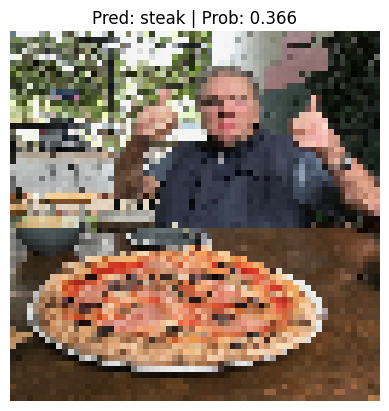

In [123]:
# pred on custom image
pred_and_plot_image(model=model_1, image_path=custom_image_path, class_names=class_names, transform=custom_image_transform, device=device)